## SYMBOLIC STUDY
# Front Axle Assembly
------------------------------------

## **SYSTEM DESCRIPTION**
-------------------------

---------------------------------------------------------------
---------------------------------------------------------------

In [1]:
import os
from uraeus.smbd.systems import assembly, load_pickled_data

In [2]:
database_directory = os.path.abspath('../../')

In [3]:
def get_template(name):
    file_ = os.path.join(database_directory, 'symenv/templates', name, 'data', '%s.stpl'%name)
    model = load_pickled_data(file_)
    model.assemble()
    return model

### Symbolic Templates

In [4]:
suspension = get_template('double_wishbone_bellcrank')

steering = get_template('rack_steering')

## Symbolic Assembly

In [5]:
model_name = 'front_axle'
sym_model = assembly(model_name)

### Adding Subsystems

In [6]:
sym_model.add_subsystem('AX1', suspension)
sym_model.add_subsystem('ST1', steering)

### Mapping Virtual Bodies

In [8]:
sym_model.assign_virtual_body('AX1.vbr_steer', 'ST1.rbs_rack')

### Assembling

In [ ]:
sym_model.assemble()

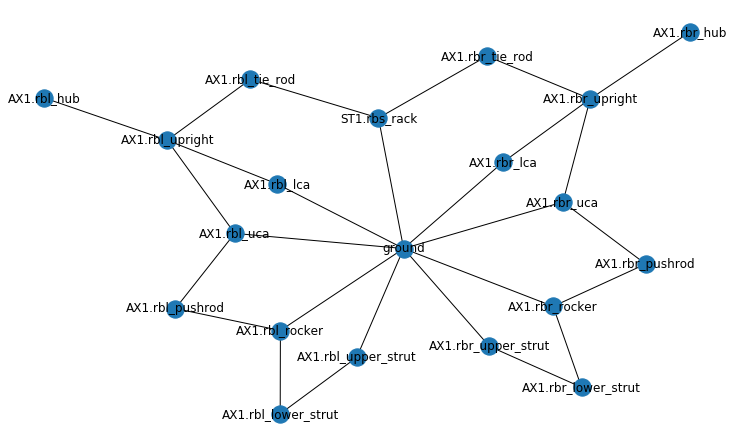

In [11]:
sym_model.draw_constraints_topology()

---------------------------------------------------------------
---------------------------------------------------------------

## **CODE GENERATION**
----------------------

This step aims to create a valid code that can be used for numerical simulation. We will use the ***python code generators*** to create a valid numerical simulation environment in python.</br>
Theoretically, the symbolic environment is uncoupled from the simulation environment, which opens the door to create various simulation environments that can be in any language.

In [12]:
from uraeus.smbd.utilities.serialization.structural.json import assembly_encoder

In [13]:
jsonfied = assembly_encoder.generator(sym_model.topology)
jsonfied.write_JSON_file('configurations')